# Исследование изменений в мобильном приложении, продающем продукты питания

**Цель проекта:**
Изучить результаты А/А/В эксперимента, проводимого с целью принять решения об изменении шрифтов в мобильном приложениии стартапа. 
<br />

**Описание данных**
Каждая запись в логе — это действие пользователя, или событие. 
EventName — название события;
DeviceIDHash — уникальный идентификатор пользователя;
EventTimestamp — время события;
ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**План работы:**
<br />

1. Загрузить и изучить данные. 
<br />

Выведем общую таблицу с данными на экран, проанализируем ее на количество пропущенных значений, типы данных.
<br />

2. Выполнить предобработку данных. 
<br />

Заменим название столбцов на названия в нижнем регистре. Преобразуем данные в нужные типы. Заменим пропуски. Создадим новый столбец с датой и временем, а также отдельный столбец дат.
<br />

3. Изучим и проверим данные.
<br />

Проанализируем сколько всего событий в логе?
Сколько всего пользователей в логе?
Сколько в среднем событий приходится на пользователя?
Найдем максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. 
Посмотрим, можно ли быть уверенным, что у нас одинаково полные данные за весь период? 
Определим, с какого момента данные полные и отбросим более старые. 
Посмотрим, данными за какой период времени мы располагаем на самом деле.
Изучим, много ли событий и пользователей мы потеряли, отбросив старые данные?
Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.
<br />

4. Изучим воронку событий.
<br />

Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 
Определим на каком шаге теряется больше всего пользователей.
Определим какая доля пользователей доходит от первого события до оплаты.
<br />

5. Изучим результаты эксперимента.
<br />

Сколько пользователей в каждой экспериментальной группе?
Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.
Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. 
Проделаем то же самое для всех других событий. 
Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Сделаем выводы из эксперимента.Выберем уровень значимости при проверке статистических гипотез. Посчитаем, сколько проверок статистических гипотез мы сделали.
<br />

5. Сделаем общие выводы.
  

## Изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
import plotly.express as px
import warnings
import scipy.stats as stats
import math as mth
from matplotlib.figure import Figure

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
#Выведем основную информацию о датафрейме методом info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Выполним предобработку данных

In [4]:
#Заменим название столбцов на более понятные, заглавные буквы поменяем на строчные буквы

data.columns = ['event_name', 'uid', 'event_time_stamp', 'exp_id']

In [5]:
data.head()

,event_name,uid,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
#Проверим датафреймы на дубликаты
dub_sum = data.duplicated().sum()
dub_sum

413

In [7]:
#Посчитаем долю дубликатов в общем объеме информации в датафейме

sum_data = data.value_counts().sum()
dub_share = round((dub_sum/sum_data*100),5)
dub_share

0.16917

**Доля дубликатов в датафрейме очень мала, менее 1%**. Их удаление не повлияет на качество информации и дальнейшую точность расчетов.
<br />



In [8]:
#Удалим дубликаты

data.drop_duplicates(inplace = True)

In [9]:
#Добавим столбец даты и времени, а также отдельный столбец дат

#Скорректируем timestamp в формат datetime
data['date_time'] = pd.to_datetime(data['event_time_stamp'], unit='s')

data['date'] = data['date_time'].dt.date

data.head()

,event_name,uid,event_time_stamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


**Выполнили предобработку данных**. 
<br />

Удалили дубликаты, переименовали столбцы, добавили новые с датой. Пропусков в таблице не обнаружено.

## Изучим и проверим данные

In [10]:
#Проанализируем количество событий в логе

event_count = data.groupby('event_name').agg({'uid': 'count'})
event_count 

,uid
event_name,
CartScreenAppear,42668
MainScreenAppear,119101
OffersScreenAppear,46808
PaymentScreenSuccessful,34118
Tutorial,1018


In [11]:
event_count_sum = data['event_name'].count()
event_count_sum

243713

**Событие MainScreenAppear произошло 119101 раз,** событие OffersScreenAppear -  46808 раз, CartScreenAppear - 42668 раз, а PaymentScreenSuccessful	- 34118 раз. Реже всего происходило событие Tutorial - 1018 раз.
<br />

Всего в логе 243713 событий.

In [12]:
#Посчитаем сколько всего пользователей в логе

user_count_sum = len(data['uid'].unique())
user_count_sum

7551

In [13]:
#Посчитаем сколько в среднем событий приходится на пользователя

event_mean = data.groupby('uid')['event_name'].count()
event_mean.describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name, dtype: float64

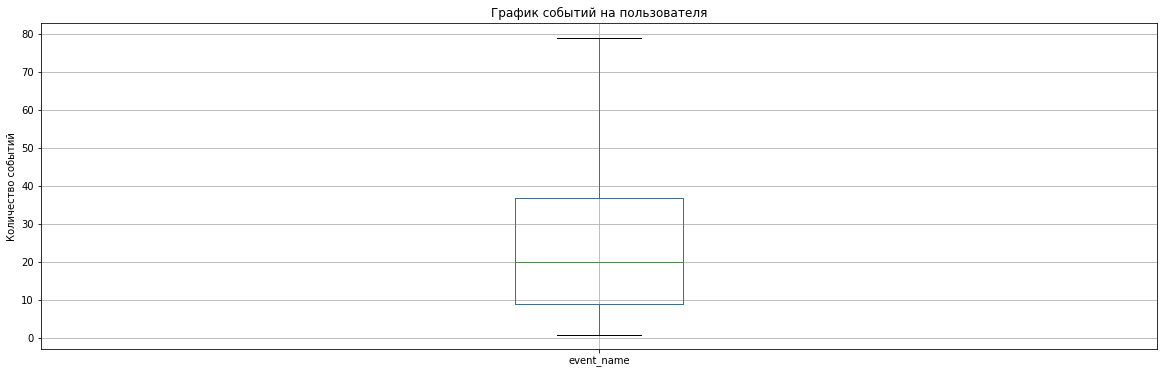

In [14]:
event_mean.to_frame().boxplot(figsize=(20, 6), showfliers = False)
plt.ylabel('Количество событий')
plt.title ('График событий на пользователя')
plt.show()

**Минимальное значение событий на пользователя - 1, а максимальное 2307,** что является выбросом. А значит среднее значение - 32 события на пользователя не корректно. Медианный показатель количества событий на одного пользователя - 20. Его и можно принять за основу для дальнейшего анализа.
<br />

In [15]:
#Найдем максимальную дату 

data['date'].max()

datetime.date(2019, 8, 7)

In [16]:
#Найдем минимальную дату

data['date'].min()

datetime.date(2019, 7, 25)

**Максимальная дата исследования 07.08.2019 г.,** а минимальная 25.07.2019 г.
<br />

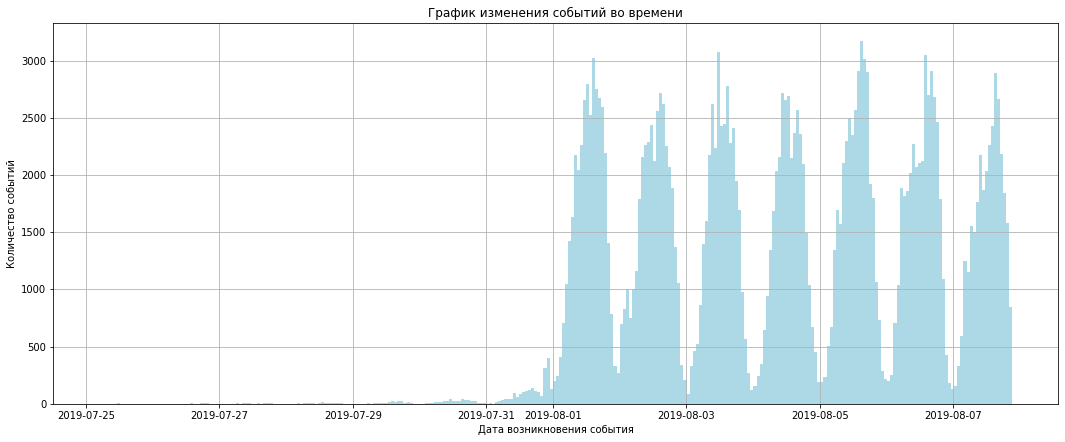

In [17]:
#построим гистограмму которая отобразит количество событий в зависимости от времени
fig = plt.figure(figsize=(18,7))
ax = fig.gca()
data['date_time'].hist(ax=ax,bins=300,color = 'lightblue')
plt.xlabel('Дата возникновения события')
plt.ylabel('Количество событий')
plt.title ('График изменения событий во времени')
plt.show() 

**Ранее мы определили минимальную дату исследования - 25.07.2019 г.,** но согласно графику выше основная масса событий начинает происходить с 01.08.2019 г. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». 
Отбросим события с 25.07.2019 г. по 31.07.2019 г. 
<br />

In [18]:
#Посчитаем сколько пользователей мы потеряли, отбросив период с 25.07.2019 г. по 31.07.2019 г. 

data_actual = pd.to_datetime('2019-08-01', format='%Y-%m-%d')
data = data[data['date'] >= data_actual]
print(
        'В обновленном периоде исследований {} пользователей.'.format(
            data['uid'].nunique())
        )
print(
        'Мы потеряли {} пользователей.'.format(
           user_count_sum - data['uid'].nunique())
        )

В обновленном периоде исследований 7534 пользователей.
Мы потеряли 17 пользователей.


In [19]:
#Посчитаем сколько событий мы потеряли, отбросив период с 25.07.2019 г. по 31.07.2019 г. 

data_actual = pd.to_datetime('2019-08-01', format='%Y-%m-%d')

print(
        'В обновленном периоде исследований {} событий.'.format(
            data['event_name'].count())
        )
print(
        'Мы потеряли {} события.'.format(
           event_count_sum - data['event_name'].count())
        )

В обновленном периоде исследований 240887 событий.
Мы потеряли 2826 события.


**В обновленном периоде исследования** мы потеряли только 17 уникальных пользователей от общего количества в 7551 пользователей, что менее 1%. 
Что касается событий, то здесь потери составили 2826 события, что чуть более 1% от общего числа событий. 
<br />

In [20]:
#Проверим, что у нас есть пользователи из всех трёх экспериментальных групп

user_exp = data.groupby('exp_id').agg({'uid': 'count'})
user_exp

,uid
exp_id,
246,79302
247,77022
248,84563


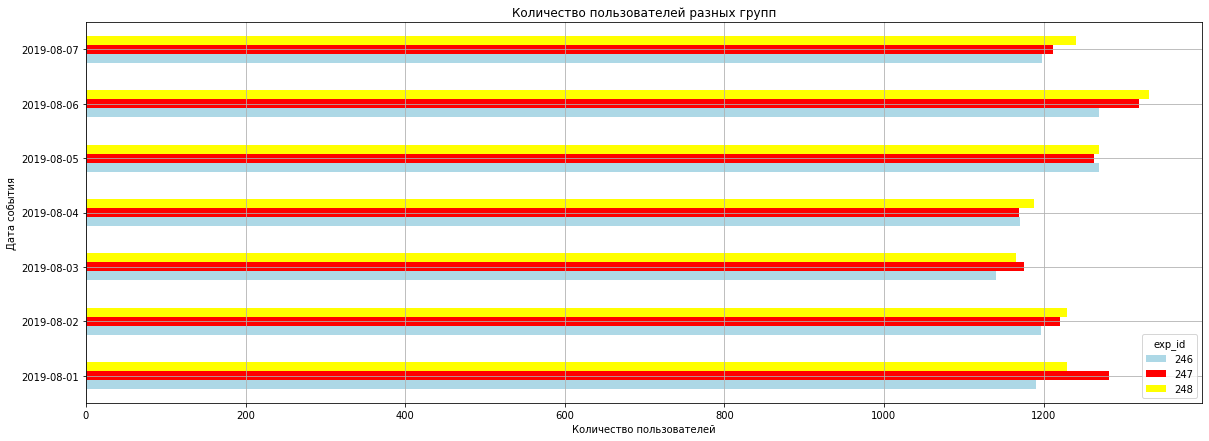

In [21]:
#построим гистограмму которая отобразит количество пользователей разных групп

(
data
    
    .pivot_table(index = 'date', columns = 'exp_id', values = 'uid', aggfunc = 'nunique')
    .plot( kind='barh', grid=True, color = ['lightblue', 'red', 'yellow'], figsize=(20, 7))    
)
plt.xlabel('Количество пользователей')
plt.ylabel('Дата события')
plt.title ('Количество пользователей разных групп')
plt.show()

**В обновленном периоде исследования** в каждой из экспериментальных групп есть пользователи. 
<br />

## Изучим воронку событий

In [22]:
#Посмотрим какие события есть в логах, как часто они встречаются, отсортируем по частоте встречаемости

event_count = data.groupby('event_name')['uid'].agg(['count']).sort_values(by = 'count', ascending=False )
event_count

,count
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


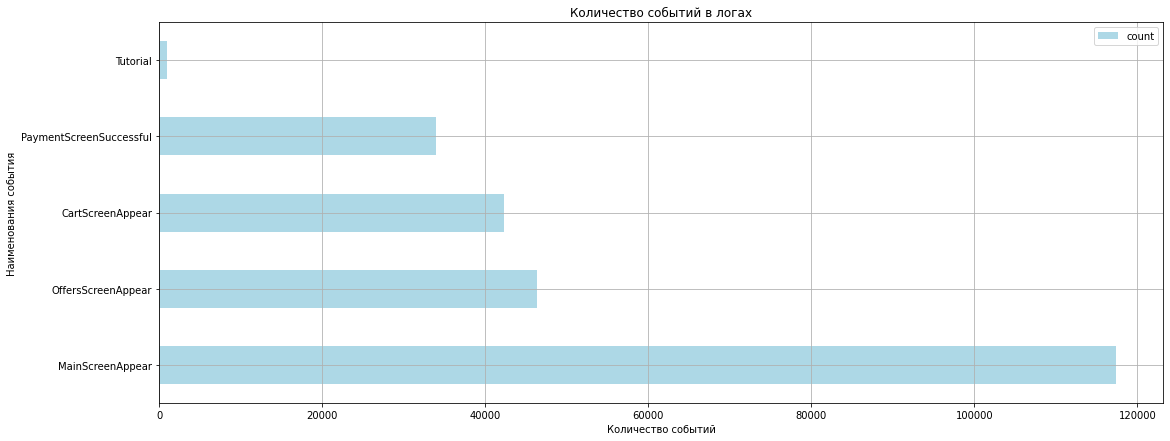

In [23]:
event_count.plot( kind='barh', grid=True, color = 'lightblue', figsize=(18, 7))    

plt.xlabel('Количество событий')
plt.ylabel('Наименования события')
plt.title ('Количество событий в логах')
plt.show()

**Чаще всего встречается** событие MainScreenAppear. 
<br />

In [24]:
#Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей
#Посчитаем долю тех пользователей, которые хоть раз совершали событие

event_users = data.groupby('event_name')['uid'].agg(['nunique']).sort_values(by = 'nunique', ascending=False ).reset_index()
event_users['share_to_all_users'] = round((event_users['nunique']/user_count_sum)*100,2)
event_users['share_to_all_users'] = event_users['share_to_all_users'].astype('str')+'%'
event_users

,event_name,nunique,share_to_all_users
0,MainScreenAppear,7419,98.25%
1,OffersScreenAppear,4593,60.83%
2,CartScreenAppear,3734,49.45%
3,PaymentScreenSuccessful,3539,46.87%
4,Tutorial,840,11.12%


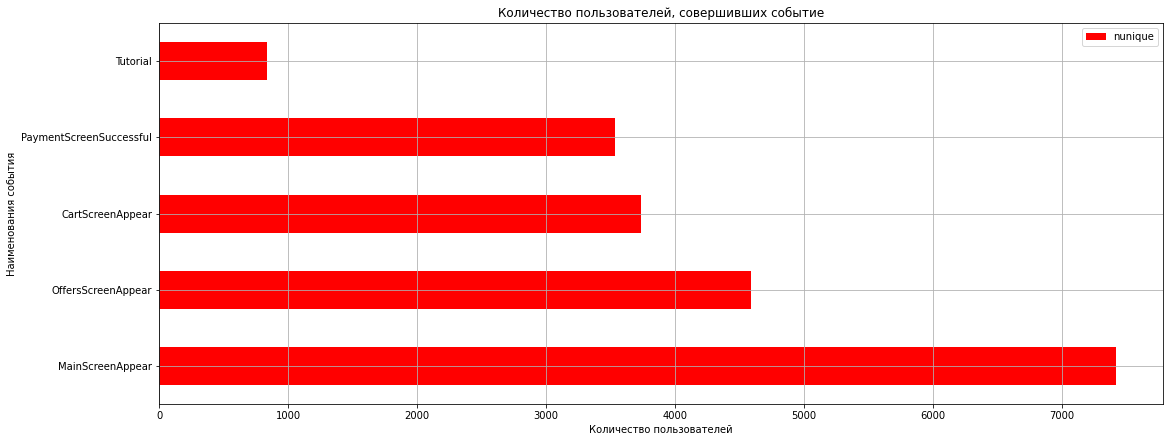

In [25]:
event_users.plot( kind='barh', x='event_name', y='nunique', grid=True, color = 'red', figsize=(18, 7))    

plt.xlabel('Количество пользователей')
plt.ylabel('Наименования события')
plt.title ('Количество пользователей, совершивших событие')
plt.show()

**Более 98% пользователей** совершают событие MainScreenAppear, 60,83% использовали OffersScreenAppear. Событие CartScreenAppear совершили 49,45% пользователей, а 46,87% пользователей дошли до оплаты (событие PaymentScreenSuccessful). Всего 11,12% пользователей изучили Tutorial.
<br />

**На мой взгляд, формирование воронки событий происходит следующим образом:** прежде всего пользователи попадают на главный экран приложения - MainScreenAppear, далее они переходят на страницу с предложением товаров - OffersScreenAppear, на следующем этапе товары добавляются в корзину и совершается событие CartScreenAppear, заключительным событием воронки является оплата товара - PaymentScreenSuccessful. Событие Tutorial является обособленным и может совершаться на том или ином этапе, оно не вписывается в воронку.
<br />

In [26]:
#По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем) 

#Удалим последнее событие Tutorial из воронки

event_users.drop([4], axis=0, inplace=True)

#Посчитаем процент пользователей

event_users['share_to_users'] = 100.0
event_users['share_to_users'] = event_users['share_to_users'].astype('str')+'%'

for i in range(1,4):
    
    event_users.loc[i,'share_to_users'] = round((event_users.loc[i,'nunique']/ event_users.loc[i-1, 'nunique']*100),0)
    event_users.loc[i,'share_to_users'] = event_users.loc[i,'share_to_users'].astype('str')+'%'

event_users            

,event_name,nunique,share_to_all_users,share_to_users
0,MainScreenAppear,7419,98.25%,100.0%
1,OffersScreenAppear,4593,60.83%,62.0%
2,CartScreenAppear,3734,49.45%,81.0%
3,PaymentScreenSuccessful,3539,46.87%,95.0%


**Анализируя количество пользователей,** совершивших то или иное событие, можно отметить, что у компании 46% пользователей, посетивших главный экран приложения, совершают покупки. В свою очередь 95% покупателей, добавивших товар в корзину переходят к его оплате.

Самый большой процент пользователей "теряется" на этапе перехода от события MainScreenAppear до OffersScreenAppear.
<br />

## Изучим результаты эксперимента

In [28]:
#Посчитаем количество пользователей в каждой экспериментальной группе

group_users = data.groupby('exp_id')['uid'].agg(['nunique']).sort_values(by = 'nunique', ascending=False ).reset_index()
group_users

,exp_id,nunique
0,248,2537
1,247,2513
2,246,2484


**В каждой из экспериментальных групп** находится около 2500 пользователей. Количество пользователей в каждой группе не равны абсолютно, они отличаются менее чем на 1%.
<br />

In [29]:
#Проверим находят ли статистические критерии разницу между выборками группы А 246 и 247
#Для начала проверим, есть ли в каждой из групп пересекающиеся пользователи

print(
        'Общее количество пересекающихся пользователей {}.'.format(
           data.groupby('uid').agg({'exp_id' : 'nunique'}).query('exp_id > 1').count())
        )

Общее количество пересекающихся пользователей exp_id    0
dtype: int64.


**Пересекающихся пользователей** не обнаружено.
<br />

In [30]:
#Посчитаем количество пользователей в каждой из групп
stats_data= ( data
        .groupby(['event_name', 'exp_id'])
        .agg({'uid': 'nunique'})
        .sort_values(by=['exp_id','uid'], ascending=False)
        .reset_index()
)
stats_data = stats_data[stats_data['event_name'] != 'Tutorial']
stats_data

,event_name,exp_id,uid
0,MainScreenAppear,248,2493
1,OffersScreenAppear,248,1531
2,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181
5,MainScreenAppear,247,2476
6,OffersScreenAppear,247,1520
7,CartScreenAppear,247,1238
8,PaymentScreenSuccessful,247,1158
10,MainScreenAppear,246,2450
11,OffersScreenAppear,246,1542


**Самым популярным событием является MainScreenAppear**. В каждой из контрольных групп это событие совершили около 2500 человек, между группами незначительное отличие. 
<br />

Всего 98% от общего числа пользователей совершили это событие.

**Далее мы должны провести расчет статистических критериев**. Для расчета у нас есть 3 группы(А/А/В) и 4 события(гипотезы), которые мы должны проверить. Группы сначала сравниваются попарно каждая, а затем объединяются две контрольные группы А и сравниваются с В. Итого будет проведено 16 тестов.
<br />

Несколько сравнений, проводимых на одних и тех же данных — это множественный тест. Его особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода или ложнопозитивный результат статистического теста. Это означает, что различий между сравниваемыми группами нет, но тест показывает p-value меньше уровня значимости. Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости. 
<br />

Используем метод Шидака.

In [31]:
#Для расчета статистических критериев разницы между выборками добавим функцию

def z_test(dataframe1, dataframe2, event, alpha):

    
    group_users = np.array([dataframe1['uid'].nunique(), 
                        dataframe2['uid'].nunique()])

    
    event_users = np.array([dataframe1[dataframe1['event_name'] == event]['uid'].nunique(), 
                        dataframe2[dataframe2['event_name'] == event]['uid'].nunique()])
    
    correct_alpha = 1 - (1 - alpha)**(1/16)
    
    p1 = event_users[0] / group_users[0]
    
    p2 = event_users[1] / group_users[1]
    
    
    p_combined = (event_users[0] + event_users[1]) / (group_users[0] + group_users[1])

    
    difference = p1 - p2 

    
    z_value = difference /  mth.sqrt(p_combined * (1 - p_combined) * (1/group_users[0] + 1/group_users[1]))

    
    distr = stats.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   
    
    print('Событие:', event)
    print('p-значение: ', p_value)

    if p_value < correct_alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы')

**Для того, чтобы проверить**, находят ли статистические критерии разницу между выборками контрольных групп А и группы с измененным шрифтом В был выбран z-тест или проверка гипотезы о равенстве долей.
<br />

**Проверим, есть ли статистически значимая разница между контрольными группами 246 и 247**
<br />

Основная гипотеза Ho: пропорции уникальных пользователей двух генеральных совокупностей одинаковы
<br />

Альтернативная гипотеза H1: пропорции уникальных пользователей двух генеральных совокупностей отличаются


In [32]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 246], data[data['exp_id'] == 247], event,0.05)
    print()

Событие: MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



**Ни по одному из событий нет статистической значимой разницы между выборками 246 и 247 группы А**
<br />

**Сравним результаты с каждой из контрольных групп в отдельности по каждому событию с группой с изменённым шрифтом.** Определим есть ли статистически значимая разница между группами.
<br />


**Проверим, есть ли статистически значимая разница между группами 246 и 248**
<br />
Основные и альтернативные гипотезы останутся те же, что и ранее.

In [33]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 246], data[data['exp_id'] == 248], event,0.05)
    print()

Событие: MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



**Ни по одному из событий нет статистической значимой разницы между выборками 246 и 248 групп А и В соответственно**
<br />

**Проверим, есть ли статистически значимая разница между группами 247 и 248**
<br />
Основные и альтернативные гипотезы останутся те же, что и ранее.

In [34]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 247], data[data['exp_id'] == 248], event,0.05)
    print()

Событие: MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



**Ни по одному из событий нет статистической значимой разницы между выборками 247 и 248 групп А и В соответственно**
<br />

**Проверим, есть ли статистически значимая разница между объединенными выборками 246 и 247 и 248 выборкой**
<br />
Основные и альтернативные гипотезы останутся те же, что и ранее.

In [35]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] != 248], data[data['exp_id'] == 248], event,0.05)
    print()

Событие: MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



**Ни по одному из событий нет статистической значимой разницы между объединенными выборками 246 и 247 и 248 выборкой**
<br />

**После всех проведенных тестов** можно сделать общий вывод о том, что никакой статистической разницы между контрольными группами и группой с измененным шрифтом нет.
<br />

**При проверке статистических гипотез** был выбран уровень значимости, равный 0.05. Было сделано 16 проверок статистических гипотез по каждому событию и по каждой из выборок.
<br />

При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. 
Попробуем изменить уровень значимости с 0.05 на 0.1, проделаем предыдущие пункты и проверим выводы.

In [36]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 246], data[data['exp_id'] == 247], event,0.1)
    print()

Событие: MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



In [37]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 246], data[data['exp_id'] == 248], event,0.1)
    print()

Событие: MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



In [38]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] == 247], data[data['exp_id'] == 248], event,0.1)
    print()

Событие: MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



In [39]:
for event in stats_data['event_name'].unique():
    z_test(data[data['exp_id'] != 248], data[data['exp_id'] == 248], event,0.1)
    print()

Событие: MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы

Событие: PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу: различия статистически не значимы



**При изменении уровня статистической значимости** с 0.05 на 0.1 получили те же результаты.
<br />

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют методы корректировки уровня значимости для снижения групповой вероятности ошибки первого рода. В своих расчетах мы применили метод Шидака.

## Общие выводы

**При изучении общих данных** было обнаружено, что основная масса событий происходит с 01.08.2019 г. В результате, был отброшен период с 25.07.2019 г. по 31.07.2019 г. В качестве актуального периода исследований выбран период с 01.08.2019 по 07.08.2019 гг.
<br />

**Изучив события в логах** мы определили, что чаще всего встречается событие MainScreenAppear (его совершили более 98% пользователей). 60,83% пользователей использовали OffersScreenAppear. Событие CartScreenAppear совершили 49,45% пользователей, а 46,87% пользователей дошли до оплаты (событие PaymentScreenSuccessful). И только 11,12% пользователей изучили Tutorial.
<br />

**По всей видимости**, формирование воронки событий происходит следующим образом: сначала пользователи попадают на главный экран приложения - событие MainScreenAppear, далее они переходят на страницу с предложением товаров - OffersScreenAppear, на следующем этапе товары добавляются в корзину и совершается событие CartScreenAppear, заключительным событием воронки является оплата товара - PaymentScreenSuccessful. Событие Tutorial не вписывается в воронку.
<br />

**Можно отметить**, что у компании 48% пользователей, посетивших главный экран приложения, совершают покупки. В свою очередь 95% покупателей, добавивших товар в корзину переходят к его оплате.Самый большой процент пользователей "теряется" на этапе перехода от события MainScreenAppear до OffersScreenAppear.
<br />


**После всех проведенных тестов на статистическую значимость** можно сделать общий вывод о том, что никакой статистической разницы между контрольными группами и группой с измененным шрифтом нет. А значит, изменение шрифтов в приложении по всей видимости, не повлияет на пользователей.
<br />